In [1]:
import jieba.analyse
import pandas as pd
import numpy as np
from scipy.misc import imread


In [3]:
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
path_en =r'source/alice.txt'
file_en = open(path_en,'r',encoding='utf-8')
file_cn = open(r'source/dahuoxiyou.txt', 'r', encoding='utf-8')
f2 = file_cn.read()
f = file_en.read()
# d = path.dirname(__file__)
font_path = r'source/weiruanyahei.ttf' # 为matplotlib设置中文字体路径没
back_coloring_path = r'source/alice_color.png' # 设置背景图片路径
back_coloring = imread( back_coloring_path) # 设置背景图片

alice_coloring = np.array(Image.open(r'source/alice_color.png'))   #读取图片

try:
    #设置停用词
    stopwords = set(STOPWORDS)
    stopwords.add('said')
    
    #没有形状的词云
    wordcloud_en = WordCloud(background_color="white",width=1000, height=860, margin=2, stopwords=stopwords).generate(f)
    #有形状的词云
    wordcloud_en_shape = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
    #创建词云（没有这个下面出不来）
    wordcloud_en_shape.generate(f)
    #创建着色
    image_colors = ImageColorGenerator(alice_coloring)
    
    #中文词云
    wordcloud_cn = WordCloud(font_path=font_path,background_color="white",width=1000, height=860, margin=2, stopwords=stopwords).generate(f2)
    wordcloud_cn_shape = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=back_coloring,  # 设置背景图片
               max_font_size=100,  # 字体最大值
               random_state=42,
               width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )
    wordcloud_cn_shape.generate(f2)
finally:
    file_en.close()
    file_cn.close()

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


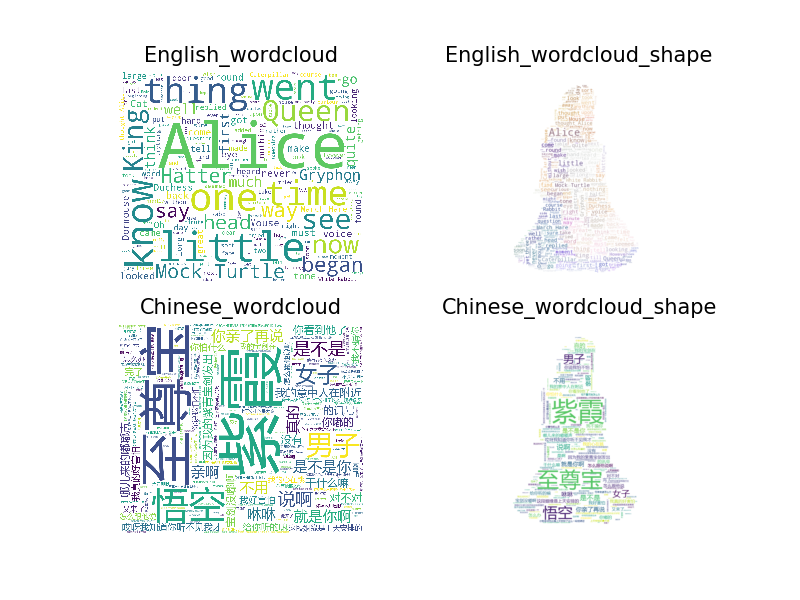

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.imshow(wordcloud_en)
ax1.axis('off')   #去除坐标边框
ax1.set_title('English_wordcloud')

ax2.imshow(wordcloud_en_shape.recolor(color_func=image_colors), interpolation="bilinear")  #recolor是按照图片的颜色布局设置字体颜色
ax2.axis('off')   #去除坐标边框
ax2.set_title('English_wordcloud_shape')

ax3.imshow(wordcloud_cn)  #recolor是按照图片的颜色布局设置字体颜色
ax3.axis('off')   #去除坐标边框
ax3.set_title('Chinese_wordcloud')

ax4.imshow(wordcloud_cn_shape, interpolation="bilinear")  #recolor是按照图片的颜色布局设置字体颜色
ax4.axis('off')   #去除坐标边框
ax4.set_title('Chinese_wordcloud_shape')

In [22]:
plt.close('all')